## Import libraries, dataset and read it

In [254]:
import pandas as pd
import numpy as np

In [255]:
from datasets import load_dataset

dataset = load_dataset("cnamuangtoun/resume-job-description-fit")

In [256]:
dataset

DatasetDict({
    train: Dataset({
        features: ['resume_text', 'job_description_text', 'label'],
        num_rows: 6241
    })
    test: Dataset({
        features: ['resume_text', 'job_description_text', 'label'],
        num_rows: 1759
    })
})

In [257]:
df = pd.concat(
    [
        dataset["train"].to_pandas(),
        dataset["test"].to_pandas()
    ],
    ignore_index=True
)
df

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit
...,...,...,...
7995,SummaryHighly motivated Sales Associate with e...,"Position Type: Full-Time, W2 Direct Hire. (Mus...",Good Fit
7996,SummaryWireless communications engineer with e...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",Good Fit
7997,Professional ProfileCapable International Tax ...,"Backed by a leading growth equity firm, an LA ...",Good Fit
7998,SummaryData Engineeringwith experience in Desi...,Allergan Data Labs is on a mission to transfor...,Good Fit


## EDA and preprocessing

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   resume_text           8000 non-null   object
 1   job_description_text  8000 non-null   object
 2   label                 8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB


In [259]:
df.head()

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [260]:
df.describe()

,resume_text,job_description_text,label
count,8000,8000,8000
unique,643,351,3
top,SummaryFinancial Accountant specializing in fi...,Calling all innovators find your future at Fi...,No Fit
freq,82,111,4000


In [261]:
# Check label distribution
print(df['label'].value_counts())

label
No Fit           4000
Potential Fit    2000
Good Fit         2000
Name: count, dtype: int64


In [262]:
# Check text length

df_text = pd.DataFrame()

df_text['resume_len'] = df['resume_text'].apply(len)
df_text['job_len'] = df['job_description_text'].apply(len)

print(df_text[['resume_len', 'job_len']].describe())


         resume_len      job_len
count   8000.000000  8000.000000
mean    5773.369000  2777.030875
std     2958.109675  1777.249968
min      897.000000    72.000000
25%     4234.000000  1309.000000
50%     5123.000000  2401.000000
75%     6603.000000  3985.000000
max    25364.000000  8171.000000


## Text preprocessing

In [263]:
#Remove punctuation and special characters

import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Normalize spaces
    
    text = re.sub(r'\S+@\S+', ' email ', text)  # replace emails
    text = re.sub(r'\+?\d[\d\s\-\(\)]{7,}\d', ' phone ', text)  # replace phone numbers
    text = re.sub(r'www\.\S+|https?://\S+|\S+\.com', ' url ', text)  # Mask URLs (simple patterns)

    # remove noisy characters
    text = re.sub(r"[^\w\s\.\'\-\/\+\[\]]", ' ', text)

    #handle numbers
    # 1. Keep years (they indicate experience recency)
    text = re.sub(r'\b(19|20)\d{2}\b', ' year_', text)  # year_2015, year_2020
    
    # 2. Keep percentages (performance metrics)
    text = re.sub(r'(\d+)%', r' percent_', text)  # percent_95, percent_100
    
    # 3. Remove other standalone numbers
    text = re.sub(r'\b\d+\b', ' ', text)

    #text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS]) # Remove stopwords

    # Normalize spaces again
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['resume_text'] = df['resume_text'].apply(preprocess_text)
df['job_description_text'] = df['job_description_text'].apply(preprocess_text)

In [264]:
# Check text length

df_text = pd.DataFrame()

df_text['resume_len'] = df['resume_text'].apply(len)
df_text['job_len'] = df['job_description_text'].apply(len)

print(df_text[['resume_len', 'job_len']].describe())


         resume_len      job_len
count   8000.000000  8000.000000
mean    5630.578750  2713.124375
std     2896.397784  1741.386845
min      883.000000    72.000000
25%     4076.000000  1271.000000
50%     4997.000000  2356.000000
75%     6421.250000  3890.000000
max    25169.000000  8055.000000


In [265]:
df.head()

,resume_text,job_description_text,label
0,summaryhighly motivated sales associate with e...,net2source inc. is an award-winning total work...,No Fit
1,professional summarycurrently working with cat...,at salas obrien we tell our clients that were ...,No Fit
2,summaryi started my construction career in jun...,schweitzer engineering laboratories sel infras...,No Fit
3,summarycertified electrical foremanwith thirte...,mizick miller company inc. is looking for a dy...,No Fit
4,summarywith extensive experience in business/r...,life at capgemini capgemini supports all aspec...,No Fit


In [266]:
# Combine text columns
df['combined_text'] = df['resume_text'] + " [SEP] " + df['job_description_text']

In [267]:
df.head()

,resume_text,job_description_text,label,combined_text
0,summaryhighly motivated sales associate with e...,net2source inc. is an award-winning total work...,No Fit,summaryhighly motivated sales associate with e...
1,professional summarycurrently working with cat...,at salas obrien we tell our clients that were ...,No Fit,professional summarycurrently working with cat...
2,summaryi started my construction career in jun...,schweitzer engineering laboratories sel infras...,No Fit,summaryi started my construction career in jun...
3,summarycertified electrical foremanwith thirte...,mizick miller company inc. is looking for a dy...,No Fit,summarycertified electrical foremanwith thirte...
4,summarywith extensive experience in business/r...,life at capgemini capgemini supports all aspec...,No Fit,summarywith extensive experience in business/r...


In [268]:
print(df['combined_text'][0])

summaryhighly motivated sales associate with extensive customer service and sales experience. outgoing sales professional with track record of driving increased sales improving buying experience and elevating company profile with target market. highlights-soft skills public speaking public relations team building project management procedure writing staff supervision and management ability to interface with professionals on all levels. accomplishments honors and activities -board of directors member for the food bank of corpus christi from november year_ to april year_. -held life insurance license -basketball official referee high school varsity level. experienceaccountant / year_- /2015aspirus owen wi perform daily and routine accounting functions for two main companies and five small royalty companies. responsibilities include but are not limited to the following accounts payable accounts receivable manage and reconcile funds for multiple banks accounts payroll perform detail audits

### Encode label columns

In [269]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

del df['label']

In [270]:
df.head()

,resume_text,job_description_text,combined_text,label_encoded
0,summaryhighly motivated sales associate with e...,net2source inc. is an award-winning total work...,summaryhighly motivated sales associate with e...,1
1,professional summarycurrently working with cat...,at salas obrien we tell our clients that were ...,professional summarycurrently working with cat...,1
2,summaryi started my construction career in jun...,schweitzer engineering laboratories sel infras...,summaryi started my construction career in jun...,1
3,summarycertified electrical foremanwith thirte...,mizick miller company inc. is looking for a dy...,summarycertified electrical foremanwith thirte...,1
4,summarywith extensive experience in business/r...,life at capgemini capgemini supports all aspec...,summarywith extensive experience in business/r...,1


In [271]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'Good Fit': np.int64(0), 'No Fit': np.int64(1), 'Potential Fit': np.int64(2)}

## Split the data

In [272]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.15, random_state=1, stratify=df['label_encoded'])
df_train, df_val = train_test_split(df_full_train,test_size=0.176, random_state=1, stratify=df_full_train['label_encoded'])

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.label_encoded.values
y_val = df_val.label_encoded.values
y_test = df_test.label_encoded.values

del df_train['label_encoded']
del df_val['label_encoded']
del df_test['label_encoded']

In [273]:
df_train

,resume_text,job_description_text,combined_text
0,summaryfull stack software engineer with + yea...,pay range 81k - 102k depending on experience.t...,summaryfull stack software engineer with + yea...
1,professional summarytalented leader and attorn...,who we are founded in year_ gatik is the leade...,professional summarytalented leader and attorn...
2,professional summarywith the attitude of learn...,hi reply requested for below job opportunity.i...,professional summarywith the attitude of learn...
3,summarydetail oriented and team focused epidem...,a little about this gig agility partners is se...,summarydetail oriented and team focused epidem...
4,professional summaryqa test analyst/ developme...,primary location melbourne florida v-soft cons...,professional summaryqa test analyst/ developme...
...,...,...,...
5598,professional profileclaire . csa from pegasyst...,description what were looking for at appfolio ...,professional profileclaire . csa from pegasyst...
5599,professional summarywith the attitude of learn...,role details we are seeking a senior software ...,professional summarywith the attitude of learn...
5600,summarycapable fund accountant successful at m...,position cost accountant reports to president ...,summarycapable fund accountant successful at m...
5601,profilehighly motivated sales associate with e...,position business analyst ivlocation st. louis...,profilehighly motivated sales associate with e...


### Converting Resume Text and Job Description Text into Vectors and Computing Cosine Similarity as a New Feature

#### TF-IDF Vectorizer
- Converts text into numbers that reflect how important each word is in a document relative to the whole collection of documents.
- **Output:** A numeric vector for each document, where each element represents the TF-IDF score of a word from the vocabulary.

#### Cosine Similarity
- Computes the angle between the two TF-IDF vectors.
- `1` → texts are very similar
- `0` → texts are completely different

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorizer
# Create SHARED vocabulary for cosine similarity
shared_tfidf = TfidfVectorizer(
    stop_words='english', 
    max_features=3000  ,
    min_df=4   
)

# Fit on BOTH resumes and JDs
all_train_text = pd.concat([
    df_train['resume_text'], 
    df_train['job_description_text']
])
shared_tfidf.fit(all_train_text)


X_train_resume = shared_tfidf.transform(df_train['resume_text'])
X_train_jd     = shared_tfidf.transform(df_train['job_description_text'])

# Cosine similarity 
cos_sim_train = cosine_similarity(X_train_resume, X_train_jd).diagonal()

# Same for val and test (transform using train TF-IDF)
X_val_resume = shared_tfidf.transform(df_val['resume_text'])
X_val_jd     = shared_tfidf.transform(df_val['job_description_text'])

cos_sim_val   = cosine_similarity(X_val_resume, X_val_jd).diagonal()

X_test_resume = shared_tfidf.transform(df_test['resume_text'])
X_test_jd     = shared_tfidf.transform(df_test['job_description_text'])

cos_sim_test = cosine_similarity(X_test_resume, X_test_jd).diagonal()

In [275]:
tfidf = TfidfVectorizer(
    stop_words='english', 
    max_features=3000  ,
    min_df=4   
)

X_train_combined = tfidf.fit_transform(df_train['combined_text'])
X_val_combined   = tfidf.transform(df_val['combined_text'])
X_test_combined  = tfidf.transform(df_test['combined_text'])

In [276]:
from scipy.sparse import hstack

X_train_final = hstack([X_train_combined, cos_sim_train.reshape(-1, 1)])
X_val_final = hstack([X_val_combined, cos_sim_val.reshape(-1, 1)])
X_test_final = hstack([X_test_combined, cos_sim_test.reshape(-1, 1)])

### check features ranges

In [277]:
# Check TF-IDF range
print("TF-IDF Combined features range:")
print(f"  Min: {X_train_combined.min():.6f}")
print(f"  Max: {X_train_combined.max():.6f}")
print(f"  Mean: {X_train_combined.mean():.6f}")

# Check cosine similarity range  
print("\nCosine similarity range:")
print(f"  Min: {cos_sim_train.min():.3f}")
print(f"  Max: {cos_sim_train.max():.3f}")
print(f"  Mean: {cos_sim_train.mean():.3f}")

TF-IDF Combined features range:
  Min: 0.000000
  Max: 0.702697
  Mean: 0.000456

Cosine similarity range:
  Min: 0.001
  Max: 0.506
  Mean: 0.176


In [278]:
feature_names = list(tfidf.get_feature_names_out()) + ['cosine_similarity']
feature_names

['000benefits',
 '000discover',
 '000k',
 '000usd',
 '000x',
 '000year',
 '00annamalai',
 '00charleston',
 '00computer',
 '00doctorate',
 '00electrical',
 '00expected',
 '00gpa',
 '00management',
 '00mumbai',
 '01totoselect',
 '0402pcb',
 '07960contract',
 '08901linkedin',
 '08electrical',
 '08totobachelors',
 '0accounting',
 '0bachelor',
 '0bachelors',
 '0business',
 '0c3',
 '0computer',
 '0coursework',
 '0databases',
 '0debugging',
 '0desert',
 '0dev',
 '0digital',
 '0electrical',
 '0electronics',
 '0eligible',
 '0expected',
 '0gpa',
 '0gpacomputer',
 '0gpaminor',
 '0information',
 '0jawaharlal',
 '0m',
 '0management',
 '0programming',
 '0servers',
 '0status',
 '0usbvalidationverilog',
 '0with',
 '1000kva',
 '100k',
 '100kva',
 '100mm',
 '100mva',
 '100mw',
 '100s',
 '100x',
 '102k',
 '103k',
 '1040nr',
 '1040s',
 '1042s',
 '105k',
 '1065s',
 '1095b',
 '1099record',
 '1099s',
 '10beosos',
 '10computer',
 '10eprgsales',
 '10g',
 '10goracle',
 '10gsoftware',
 '10k',
 '10m',
 '10microso

### Training the model with logistic regression

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model (same as before!)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_final, y_train)

# Get predictions
y_pred = model.predict(X_val_final)
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2%}")

Accuracy: 59.06%


In [280]:
report = classification_report(y_val, y_pred, target_names=le.classes_)
print(report)

               precision    recall  f1-score   support

     Good Fit       0.56      0.75      0.64       299
       No Fit       0.74      0.49      0.59       599
Potential Fit       0.48      0.64      0.55       299

     accuracy                           0.59      1197
    macro avg       0.59      0.63      0.59      1197
 weighted avg       0.63      0.59      0.59      1197



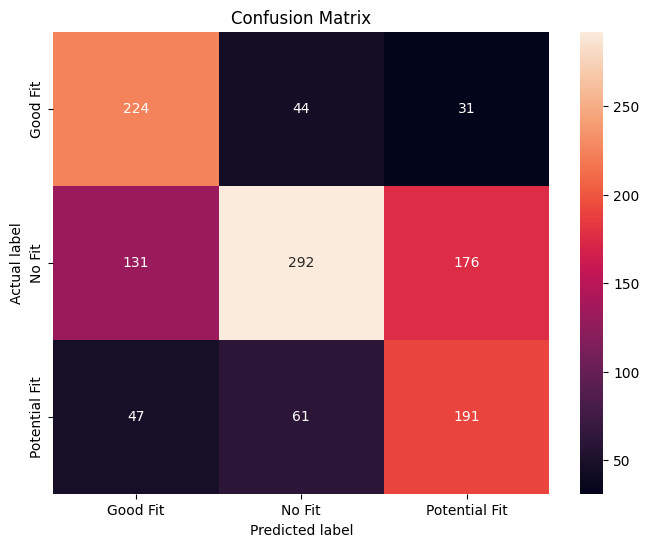

In [281]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

dt = DecisionTreeClassifier(random_state=42,
        class_weight='balanced')
dt.fit(X_train_final, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [283]:
# Get predictions

y_pred_train = dt.predict(X_train_final)
y_pred_val = dt.predict(X_val_final)

train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)
    
print(f"Train Accuracy: {train_acc:.2%}")
print(f"Val Accuracy:   {val_acc:.2%}")
print(f"gap:    {train_acc - val_acc:+.2%}")

Train Accuracy: 99.91%
Val Accuracy:   55.81%
gap:    +44.10%


In [284]:
report = classification_report(y_val, y_pred_val, target_names=le.classes_)
print(report)

               precision    recall  f1-score   support

     Good Fit       0.55      0.56      0.55       299
       No Fit       0.63      0.59      0.61       599
Potential Fit       0.44      0.48      0.46       299

     accuracy                           0.56      1197
    macro avg       0.54      0.55      0.54      1197
 weighted avg       0.56      0.56      0.56      1197



In [285]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Get class indices
class_names = le.classes_
good_fit_idx = list(class_names).index('Good Fit')
no_fit_idx = list(class_names).index('No Fit')


depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

print("Depth -> Good Fit Recall | No Fit Precision | Weighted F1")
print("-" * 50)

for depth in depths: 
    dt = DecisionTreeClassifier(
        max_depth=depth,
        class_weight='balanced',
        random_state=42
    )
    dt.fit(X_train_final, y_train)
    
    y_pred = dt.predict(X_val_final)
    
    # Calculate your three metrics
    good_fit_recall = recall_score(y_val == good_fit_idx, y_pred == good_fit_idx)
    No_fit_precision = precision_score(y_val == no_fit_idx, y_pred == no_fit_idx)
    weighted_f1 = f1_score(y_val, y_pred, average='weighted')
    
    print(f'{str(depth):>4} -> {good_fit_recall:>11.3f} | {No_fit_precision:>13.3f} | {weighted_f1:>11.3f}')

Depth -> Good Fit Recall | No Fit Precision | Weighted F1
--------------------------------------------------


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 ->       0.074 |         0.000 |       0.132
   2 ->       0.234 |         0.727 |       0.193
   3 ->       0.254 |         0.769 |       0.209
   4 ->       0.485 |         0.938 |       0.244
   5 ->       0.545 |         0.718 |       0.268
   6 ->       0.548 |         0.714 |       0.290
  10 ->       0.585 |         0.724 |       0.383
  15 ->       0.635 |         0.701 |       0.497
  20 ->       0.595 |         0.664 |       0.526
None ->       0.559 |         0.628 |       0.560


In [286]:
depths = [1, 3, 20, None]

print("Depth | Min Leaf | Good Fit Recall | No Fit Precision | Weighted F1")
print("-" * 50)

for depth in depths:
    for min_leaf in [1, 5, 10, 15, 20, 100]:
        dt = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_leaf=min_leaf,
            class_weight='balanced',
            random_state=42
        )
        dt.fit(X_train_final, y_train)
        
        y_pred = dt.predict(X_val_final)
        
        # Calculate your three metrics
        good_fit_recall = recall_score(y_val == good_fit_idx, y_pred == good_fit_idx)
        No_fit_precision = precision_score(y_val == no_fit_idx, y_pred == no_fit_idx)
        weighted_f1 = f1_score(y_val, y_pred, average='weighted')
        
        print(f'{str(depth):>4} | {min_leaf:>9} | {good_fit_recall:>11.3f} | {No_fit_precision:>13.3f} | {weighted_f1:>11.3f}')

Depth | Min Leaf | Good Fit Recall | No Fit Precision | Weighted F1
--------------------------------------------------


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |         1 |       0.074 |         0.000 |       0.132


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |         5 |       0.074 |         0.000 |       0.132


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |        10 |       0.074 |         0.000 |       0.132


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |        15 |       0.074 |         0.000 |       0.132


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |        20 |       0.074 |         0.000 |       0.132


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


   1 |       100 |       0.074 |         0.000 |       0.132
   3 |         1 |       0.254 |         0.769 |       0.209
   3 |         5 |       0.254 |         0.769 |       0.209
   3 |        10 |       0.254 |         0.769 |       0.209
   3 |        15 |       0.254 |         0.769 |       0.209
   3 |        20 |       0.254 |         0.750 |       0.207
   3 |       100 |       0.254 |         0.667 |       0.201
  20 |         1 |       0.595 |         0.664 |       0.526
  20 |         5 |       0.559 |         0.655 |       0.518
  20 |        10 |       0.538 |         0.621 |       0.478
  20 |        15 |       0.615 |         0.670 |       0.483
  20 |        20 |       0.625 |         0.663 |       0.510
  20 |       100 |       0.669 |         0.622 |       0.462
None |         1 |       0.559 |         0.628 |       0.560
None |         5 |       0.585 |         0.650 |       0.552
None |        10 |       0.572 |         0.626 |       0.519
None |        15 |      

In [287]:
depth = 1 #leaf= default
#depth=20 -> leaf=100

### Random Forest

In [288]:
from sklearn.ensemble import RandomForestClassifier

# Get class indices
class_names = le.classes_
good_fit_idx = list(class_names).index('Good Fit')
no_fit_idx = list(class_names).index('No Fit')


print("n_estimators -> Good Fit Recall | No Fit Precision | Weighted F1")
print("-" * 50)

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, class_weight='balanced', random_state=42, n_jobs=-1)
    rf.fit(X_train_final, y_train)
    
    y_pred = rf.predict(X_val_final)
    
    # Calculate your three metrics
    good_fit_recall = recall_score(y_val == good_fit_idx, y_pred == good_fit_idx)
    No_fit_precision = precision_score(y_val == no_fit_idx, y_pred == no_fit_idx)
    weighted_f1 = f1_score(y_val, y_pred, average='weighted')
    
    print(f'{str(n):>4} -> {good_fit_recall:>11.3f} | {No_fit_precision:>13.3f} | {weighted_f1:>11.3f}')

n_estimators -> Good Fit Recall | No Fit Precision | Weighted F1
--------------------------------------------------
  10 ->       0.522 |         0.617 |       0.557
  20 ->       0.555 |         0.629 |       0.582
  30 ->       0.592 |         0.653 |       0.618
  40 ->       0.559 |         0.638 |       0.606
  50 ->       0.572 |         0.639 |       0.605
  60 ->       0.559 |         0.642 |       0.608
  70 ->       0.552 |         0.643 |       0.607
  80 ->       0.545 |         0.637 |       0.602
  90 ->       0.548 |         0.642 |       0.606
 100 ->       0.548 |         0.643 |       0.606
 110 ->       0.548 |         0.635 |       0.603
 120 ->       0.562 |         0.646 |       0.613
 130 ->       0.559 |         0.642 |       0.608
 140 ->       0.562 |         0.638 |       0.604
 150 ->       0.565 |         0.648 |       0.614
 160 ->       0.565 |         0.650 |       0.615
 170 ->       0.572 |         0.647 |       0.615
 180 ->       0.582 |         0.64

In [289]:
n_estimators=60 #60 ->       0.565 |         0.646 |       0.615